<a href="https://colab.research.google.com/github/Aditi15091999/PDV-Assignments/blob/main/211057020_Aditi_PDV_theory_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the necessary libraries
import numpy as np
import pandas as pd

In [ ]:
#import the dataset
df=pd.read_csv('titanic_train.csv')
#Display the dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Data Preprocessing and Data Wrangling**

**Perform Data Analysis to better understand the data**

In [ ]:
df.head()# this gives an insight of the the first 5 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#dropping columns which are of not much use for the prediction
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.groupby('Embarked').size() # this groups the data by the values of the embarked column

Embarked
C    168
Q     77
S    644
dtype: int64

In [ ]:
#To find out what type of columns the dataset contains and whether
#these columns contain value or not we can use the "info()" function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
# to get information on the standard deviation, mean, min etc use describe function
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Survived'].value_counts() # used to get the count of each column

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
fname,fcount=np.unique(df['Pclass'],return_counts=True)
print(f'{fname[0]}:{fcount[0]}')
print(f'{fname[1]}:{fcount[1]}')
print(f'{fname[2]}:{fcount[2]}')

1:216
2:184
3:491


In [ ]:
df['Pclass'].unique() #unique value of the column

array([3, 1, 2])

In [ ]:
df.isnull().sum() #checking if there are null values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df['Embarked'].fillna('S',inplace=True) # fill missng values using fillna() method

In [ ]:
df['Age'] = df['Age'].replace(np.nan, df['Age'].mean()) #fill missng values using replace() method

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#making categorical encoding
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1, }).astype(float)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2 }).astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.0,1,0,7.2500,0
1,1,1,1.0,38.0,1,0,71.2833,1
2,1,3,1.0,26.0,0,0,7.9250,0
3,1,1,1.0,35.0,1,0,53.1000,0
4,0,3,0.0,35.0,0,0,8.0500,0


**Data Visualization**

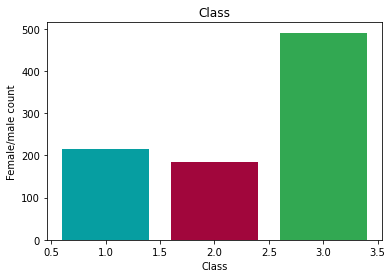

In [ ]:
import matplotlib.pyplot as plt
plt.bar(fname,fcount,color=['#069ea1','#a1063c','#32a852'])
plt.xlabel('Class')
plt.ylabel('Female/male count')
plt.title('Class')
plt.show()

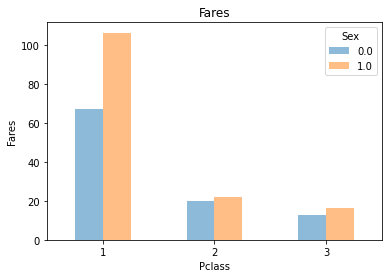

In [ ]:
df_pivot = pd.pivot_table(df, values="Fare",index="Pclass",columns="Sex", aggfunc=np.mean)
#Creating a grouped bar chart
ax = df_pivot.plot(kind="bar",alpha=0.5)
#Adding the aesthetics
plt.title('Fares')
plt.xlabel('Pclass')
plt.ylabel('Fares') 
plt.xticks(rotation=0)
# Show the plot
plt.show()

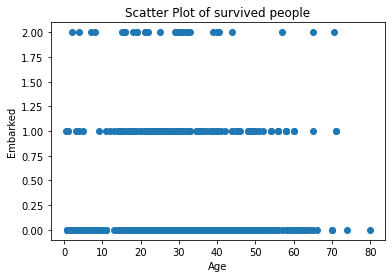

In [ ]:
plt.scatter(df['Age'], df['Embarked'])
plt.title("Scatter Plot of survived people")
plt.xlabel('Age')
plt.ylabel('Embarked')
  
plt.show()

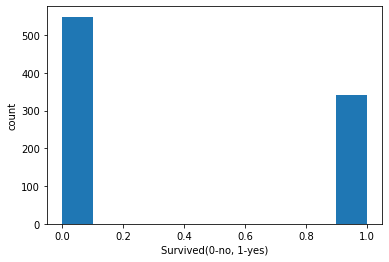

In [ ]:
plt.hist(df['Survived'])
plt.xlabel("Survived(0-no, 1-yes)")
plt.ylabel("count")
plt.show()

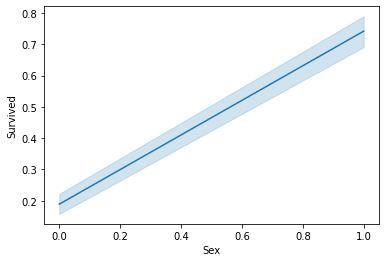

In [ ]:
import seaborn as sns
sns.lineplot(x="Sex", y="Survived", data=df)
plt.show()


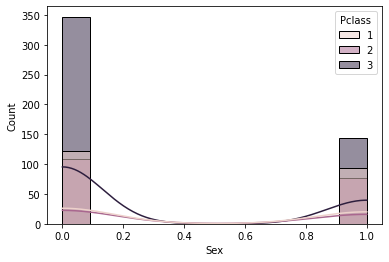

In [ ]:
sns.histplot(x='Sex', data=df, kde=True, hue='Pclass')
plt.show()

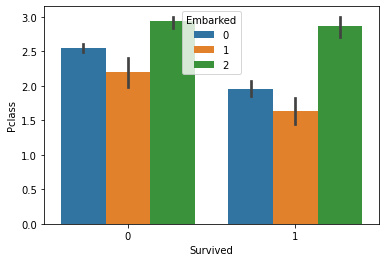

In [ ]:
sns.barplot(x='Survived',y='Pclass', data=df, hue='Embarked')
  
plt.show()

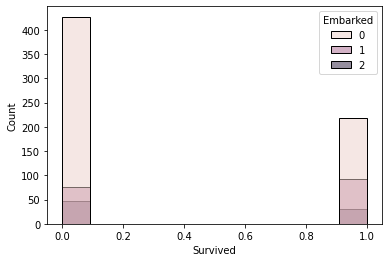

In [ ]:
sns.histplot(x='Survived', data=df, hue='Embarked')
  
plt.show()

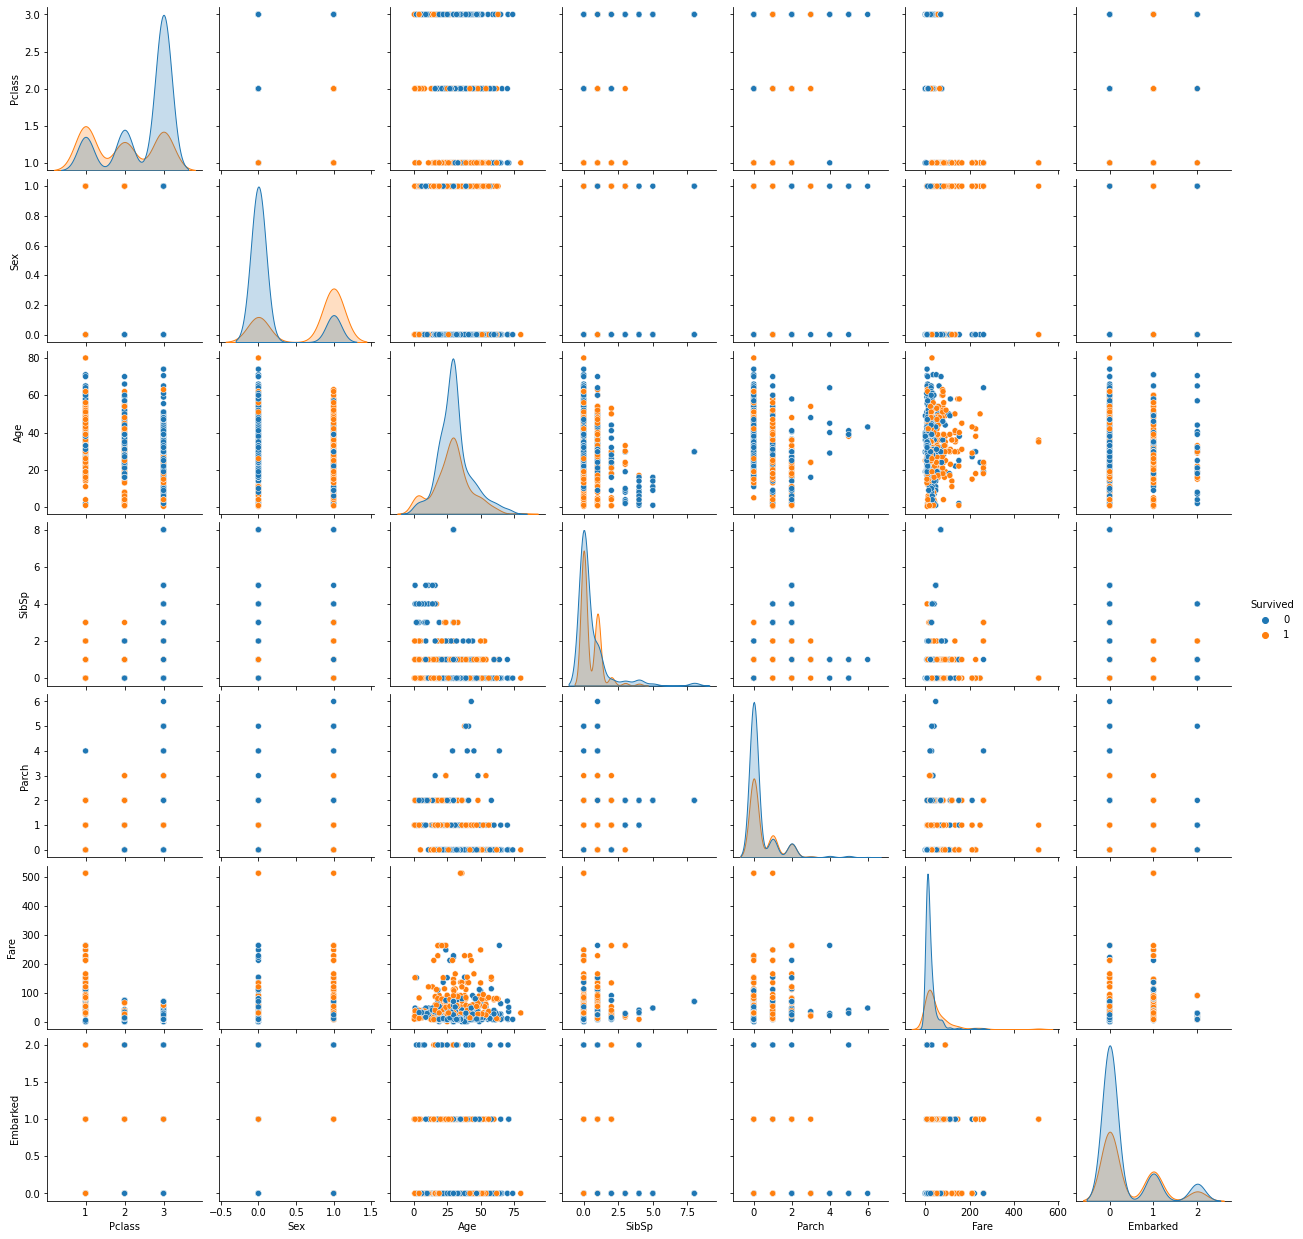

In [ ]:
sns.pairplot(df, hue ='Survived')
plt.show()